In [14]:
import os

base_path = "/kaggle/input/fashion-product-images-dataset/fashion-dataset"
print(os.listdir(base_path))


['images.csv', 'images', 'styles.csv', 'styles', 'fashion-dataset']


In [15]:
import pandas as pd

meta = pd.read_csv(os.path.join(base_path, "styles.csv"), on_bad_lines='skip')
print(meta)


          id gender masterCategory subCategory            articleType  \
0      15970    Men        Apparel     Topwear                 Shirts   
1      39386    Men        Apparel  Bottomwear                  Jeans   
2      59263  Women    Accessories     Watches                Watches   
3      21379    Men        Apparel  Bottomwear            Track Pants   
4      53759    Men        Apparel     Topwear                Tshirts   
...      ...    ...            ...         ...                    ...   
44419  17036    Men       Footwear       Shoes           Casual Shoes   
44420   6461    Men       Footwear  Flip Flops             Flip Flops   
44421  18842    Men        Apparel     Topwear                Tshirts   
44422  46694  Women  Personal Care   Fragrance  Perfume and Body Mist   
44423  51623  Women    Accessories     Watches                Watches   

      baseColour  season    year   usage  \
0      Navy Blue    Fall  2011.0  Casual   
1           Blue  Summer  2012.0  C

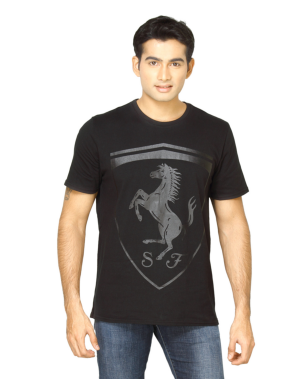

In [16]:
import cv2
import matplotlib.pyplot as plt

img_path = os.path.join(base_path, "images", "11255.jpg")  # Example ID
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")
plt.show()


In [17]:
# View all unique master categories
unique_categories = meta['masterCategory'].unique()
unique_articles= meta['articleType'].unique()
unique_subCategory = meta['subCategory'].unique()
print("Unique values in masterCategory:\n", unique_categories)

print("Unique values in unique_articles:\n\n", unique_articles)

print("Unique values in unique_subCategory:\n\n", unique_subCategory)

print("\nTotal unique categories:", len(unique_categories))
category_counts = meta['masterCategory'].value_counts()
print(category_counts)


Unique values in masterCategory:
 ['Apparel' 'Accessories' 'Footwear' 'Personal Care' 'Free Items'
 'Sporting Goods' 'Home']
Unique values in unique_articles:

 ['Shirts' 'Jeans' 'Watches' 'Track Pants' 'Tshirts' 'Socks' 'Casual Shoes'
 'Belts' 'Flip Flops' 'Handbags' 'Tops' 'Bra' 'Sandals' 'Shoe Accessories'
 'Sweatshirts' 'Deodorant' 'Formal Shoes' 'Bracelet' 'Lipstick' 'Flats'
 'Kurtas' 'Waistcoat' 'Sports Shoes' 'Shorts' 'Briefs' 'Sarees'
 'Perfume and Body Mist' 'Heels' 'Sunglasses' 'Innerwear Vests' 'Pendant'
 'Nail Polish' 'Laptop Bag' 'Scarves' 'Rain Jacket' 'Dresses'
 'Night suits' 'Skirts' 'Wallets' 'Blazers' 'Ring' 'Kurta Sets' 'Clutches'
 'Shrug' 'Backpacks' 'Caps' 'Trousers' 'Earrings' 'Camisoles' 'Boxers'
 'Jewellery Set' 'Dupatta' 'Capris' 'Lip Gloss' 'Bath Robe' 'Mufflers'
 'Tunics' 'Jackets' 'Trunk' 'Lounge Pants' 'Face Wash and Cleanser'
 'Necklace and Chains' 'Duffel Bag' 'Sports Sandals'
 'Foundation and Primer' 'Sweaters' 'Free Gifts' 'Trolley Bag'
 'Tracksuits' 'S

In [18]:
# Keep only rows where masterCategory == 'Apparel'
# apparel_df = meta[meta['masterCategory'] == 'Apparel']
# apparel_df = meta[meta['masterCategory'] == 'Apparel' || meta['subCategory'] == 'Topwear' || meta['subCategory'] == 'Bottomwear' || meta['subCategory'] == 'Saree' || meta['subCategory'] == 'Dress' || meta['subCategory'] == 'Loungewear' || meta['subCategory'] == 'Nightwear' || meta['subCategory'] == 'Apparel Set' || meta['subCategory'] == 'Mufflers' || meta['subCategory'] == 'Gloves']
apparel_df = meta[
    (meta['masterCategory'] == 'Apparel') &
    (meta['subCategory'].isin(['Topwear', 'Bottomwear', 'Saree', 'Dress',
                               'Loungewear', 'Nightwear', 'Apparel Set',
                               'Mufflers', 'Gloves']))
]

# Drop any rows missing an ID or image
apparel_df = apparel_df.dropna(subset=['id'])

print("Total Apparel items:", len(apparel_df))
apparel_df.head()


Total Apparel items: 19107


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt


In [19]:
import shutil
import random

# Create target folders
inventory_dir = "/kaggle/working/inventory"
query_dir = "/kaggle/working/query"
os.makedirs(inventory_dir, exist_ok=True)
os.makedirs(query_dir, exist_ok=True)

image_dir = os.path.join(base_path, "images")
all_images = os.listdir(image_dir)
# Shuffle and pick sample
apparel_ids = apparel_df['id'].astype(str).tolist()
random.shuffle(apparel_ids)

selected_ids = apparel_ids[:2000]  # take first 2000 apparel items
query_ids = random.sample(selected_ids, 100)  # pick 100 queries

# Copy files safely
for img_id in selected_ids:
    src = os.path.join(image_dir, img_id + ".jpg")
    dst = os.path.join(inventory_dir, img_id + ".jpg")
    if os.path.exists(src):
        shutil.copy(src, dst)

for img_id in query_ids:
    src = os.path.join(image_dir, img_id + ".jpg")
    dst = os.path.join(query_dir, img_id + ".jpg")
    if os.path.exists(src):
        shutil.copy(src, dst)

print(" Apparel images copied successfully.")

# import shutil
# import random

# inventory_dir = "/kaggle/working/inventory"
# query_dir = "/kaggle/working/query"
# os.makedirs(inventory_dir, exist_ok=True)
# os.makedirs(query_dir, exist_ok=True)

# image_dir = os.path.join(base_path, "images")
# all_images = os.listdir(image_dir)

# # Randomly sample
# random.shuffle(all_images)
# inventory_images = all_images[:2000]
# query_images = random.sample(inventory_images, 100)

# for img_name in inventory_images:
#     shutil.copy(os.path.join(image_dir, img_name), inventory_dir)

# for img_name in query_images:
#     shutil.copy(os.path.join(image_dir, img_name), query_dir)


 Apparel images copied successfully.


In [7]:
# !rm -rf /kaggle/working/inventory/10007.jpg
# !rm -f /kaggle/working/inventory/10007.jpg


In [20]:
import cv2
import random
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (400, 400))
    return resized


# Example
# sample_img = random.choice(os.listdir(inventory_dir))
# img = preprocess_image(os.path.join(inventory_dir, sample_img))
# plt.imshow(img, cmap='gray')
# plt.axis('off')
# plt.show()


In [21]:
def extract_features(img):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(img, None)
    return keypoints, descriptors


In [22]:
def match_features(desc1, desc2):
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(desc1, desc2, k=2)

    # Lowe’s ratio test to keep good matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)
    return good_matches


In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt

def find_best_match(query_path, inventory_dir, top_k=3):
    query_img = preprocess_image(query_path)
    if query_img is None:
        print("Query image not found or unreadable.")
        return []
    
    _, query_desc = extract_features(query_img)
    results = []

    for filename in os.listdir(inventory_dir):
        inv_path = os.path.join(inventory_dir, filename)
        inv_img = preprocess_image(inv_path)
        if inv_img is None:
            continue
        
        _, inv_desc = extract_features(inv_img)
        if inv_desc is None or len(inv_desc) == 0:
            continue
        
        good_matches = match_features(query_desc, inv_desc)
        score = len(good_matches)  # more matches = more similar
        results.append((filename, score))

    # Sort by descending match score
    results.sort(key=lambda x: x[1], reverse=True)
    return results[:top_k]


In [24]:
def visualize_matches(query_path, inventory_dir, best_matches):
    query_img = preprocess_image(query_path)
    kp1, desc1 = extract_features(query_img)

    plt.figure(figsize=(15,5))
    for i, (fname, score) in enumerate(best_matches):
        inv_img = preprocess_image(os.path.join(inventory_dir, fname))
        kp2, desc2 = extract_features(inv_img)
        good_matches = match_features(desc1, desc2)

        match_img = cv2.drawMatches(query_img, kp1, inv_img, kp2, good_matches[:10], None, flags=2)
        plt.subplot(1, len(best_matches), i+1)
        plt.imshow(match_img, cmap='gray')
        plt.title(f"{fname}\nScore: {score}")
        plt.axis('off')
    plt.show()


Top Matches: [('10068.jpg', 230), ('10075.jpg', 38), ('18575.jpg', 27)]


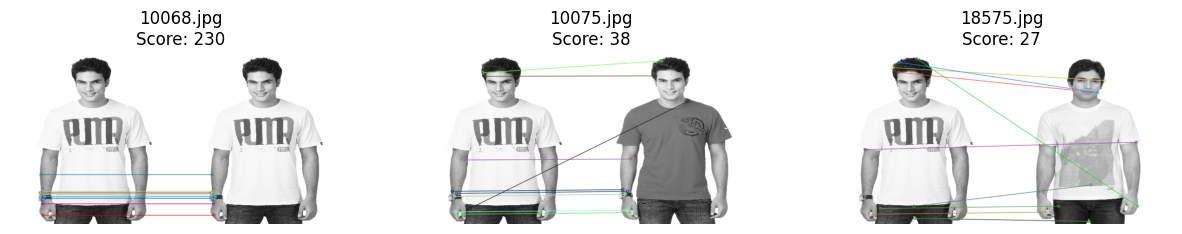

In [29]:
query_path = "/kaggle/working/query/10068.jpg"  # example query
inventory_dir = "/kaggle/working/inventory"

best_matches = find_best_match(query_path, inventory_dir, top_k=3)
print("Top Matches:", best_matches)

visualize_matches(query_path, inventory_dir, best_matches)


Enter the full path of the image to search:  /kaggle/input/test111/hello.jpg


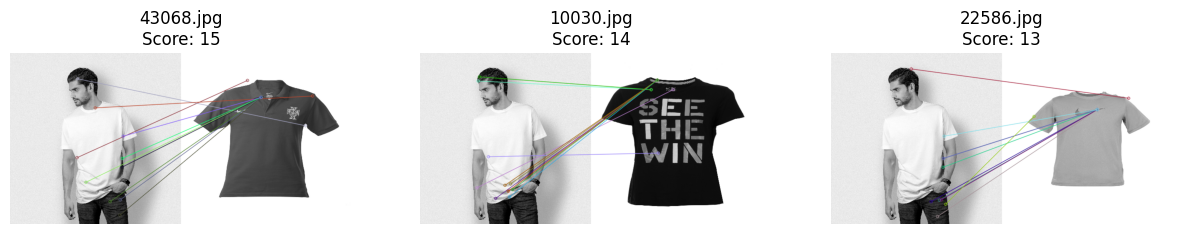

In [30]:
# Ask user to enter the path of the query image
query_image_path = input("Enter the full path of the image to search: ")

# Run your existing visual search
best_matches = find_best_match(query_image_path, inventory_dir, top_k=3)
visualize_matches(query_image_path, inventory_dir, best_matches)


In [31]:
def process_image(b):
    print("s")
    if len(upload.value) == 0:
        with output:
            clear_output()
            print("No file uploaded yet!")
        return
    
    # Get uploaded file
    uploaded_file = list(upload.value.values())[0]
    content = uploaded_file['content']
    filename = uploaded_file['metadata']['name']
    
    # Save file
    filepath = os.path.join(UPLOAD_DIR, filename)
    with open(filepath, 'wb') as f:
        f.write(content)
    
    # Display uploaded image
    with output:
        clear_output()
        print(f"File saved to: {filepath}")
        img = Image.open(filepath)
        display(img)
    
    # Call your visual search functions
    best_matches = find_best_match(filepath, "inventory_folder", top_k=3)
    
    visualize_matches(filepath, "inventory_folder", best_matches)